# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [37]:
# Your answer to Graded Task 1 here:

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"

# Reading the CSV file into a Pandas DataFrame
dataset = pd.read_csv(url)

# Displaying the first few rows of the DataFrame 
print(dataset.head())

   storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67        NaN         NaN   5     119   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9          Morrilton       AR    72110  Supercenter   
4  3801 CAMP ROBINSON RD.  North Little Rock       AR    72118     Wal-Mart   

         LAT       LON  MONTH  DAY  YEAR  
0  36.342235 -94.07141      7    1  1962  
1  36.236984 -93.09345      8    1  1964  
2  36.179905 -94.50208      8    1  1965 

#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [42]:
super_stores = dataset[dataset['type_store'] == 'Supercenter']

# Block 1: Find the 7th highest total number of Walmart super stores by state
super_store_counts_by_state = super_stores['STRSTATE'].value_counts().reset_index()
super_store_counts_by_state.columns = ['State', 'Super Store Count']
super_store_counts_by_state = super_store_counts_by_state.sort_values(by='Super Store Count', ascending=False)

if len(super_store_counts_by_state) >= 7:
    seventh_highest_state = super_store_counts_by_state.iloc[6]['State']
    print("Block 1: State with the 7th highest total number of Walmart super stores:", seventh_highest_state)
else:
    print("Block 1: There are not enough states with super stores to find the 7th highest.")

# Block 2: Find the 5th highest total number of Walmart stores (super stores and regular stores combined) by city
total_store_counts_by_city = df['STRCITY'].value_counts().reset_index()
total_store_counts_by_city.columns = ['City', 'Total Store Count']
total_store_counts_by_city = total_store_counts_by_city.sort_values(by='Total Store Count', ascending=False)

if len(total_store_counts_by_city) >= 5:
    fifth_highest_city = total_store_counts_by_city.iloc[4]['City']
    print("Block 2: City with the 5th highest total number of Walmart stores:", fifth_highest_city)
else:
    print("Block 2: There are not enough cities with stores to find the 5th highest.")

Block 1: State with the 7th highest total number of Walmart super stores: AL
Block 2: City with the 5th highest total number of Walmart stores: Greenville


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [44]:
import pandas as pd

def cumulative_store_count_by_state(dataframe, state_abbr):
    # Filtering the DataFrame for the specified state
    state_df = dataframe[dataframe['STRSTATE'] == state_abbr]

    # Converting 'OPENDATE' column to datetime
    state_df['OPENDATE'] = pd.to_datetime(state_df['OPENDATE'], format='%m/%d/%y', errors='coerce')
    state_df['OPENDATE'].fillna(pd.to_datetime(state_df['OPENDATE'], format='%Y-%m-%d', errors='coerce'), inplace=True)

    # Sorting the filtered DataFrame by the opening date
    state_df = state_df.sort_values(by='OPENDATE')

    # Creating a new DataFrame with date and cumulative store count columns
    state_cumulative_df = pd.DataFrame({
        'date': state_df['OPENDATE'],
        'cumsum': range(1, len(state_df) + 1)  # Cumulative store count
    })

    return state_cumulative_df

# Example usage:
result_df = cumulative_store_count_by_state(df, 'CA')
print(result_df)

           date  cumsum
1431 1990-08-01       1
1479 1990-10-29       2
1446 1990-12-03       3
1537 1991-01-30       4
1544 1991-01-30       5
...         ...     ...
2864 2005-08-24     155
2870 2005-08-24     156
2954 2005-10-26     157
2978 2006-01-27     158
2991 2006-01-31     159

[159 rows x 2 columns]


C:\Users\RajaShekar\AppData\Local\Temp\ipykernel_25972\3959472039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['OPENDATE'] = pd.to_datetime(state_df['OPENDATE'], format='%m/%d/%y', errors='coerce')
C:\Users\RajaShekar\AppData\Local\Temp\ipykernel_25972\3959472039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['OPENDATE'].fillna(pd.to_datetime(state_df['OPENDATE'], format='%Y-%m-%d', errors='coerce'), inplace=True)


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

C:\Users\RajaShekar\AppData\Local\Temp\ipykernel_25972\1170626362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idaho_df['OPENDATE'] = pd.to_datetime(idaho_df['OPENDATE'], format='%m/%d/%y', errors='coerce')
C:\Users\RajaShekar\AppData\Local\Temp\ipykernel_25972\1170626362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idaho_df['OPENDATE'].fillna(pd.to_datetime(idaho_df['OPENDATE'], format='%Y-%m-%d', errors='coerce'), inplace=True)


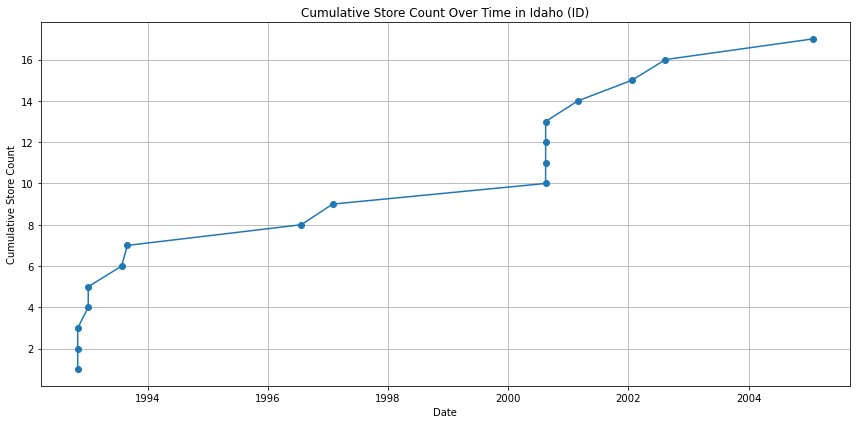

In [45]:
import matplotlib.pyplot as plt

# Filtering the DataFrame for the state of Idaho (ID)
idaho_df = df[df['STRSTATE'] == 'ID']

# Converting the 'OPENDATE' column to datetime
idaho_df['OPENDATE'] = pd.to_datetime(idaho_df['OPENDATE'], format='%m/%d/%y', errors='coerce')
idaho_df['OPENDATE'].fillna(pd.to_datetime(idaho_df['OPENDATE'], format='%Y-%m-%d', errors='coerce'), inplace=True)

# Sorting the DataFrame by the opening date
idaho_df = idaho_df.sort_values(by='OPENDATE')

# Calculating the cumulative store count
idaho_df['cumsum'] = range(1, len(idaho_df) + 1)

# Creating a time series plot
plt.figure(figsize=(12, 6))
plt.plot(idaho_df['OPENDATE'], idaho_df['cumsum'], marker='o', linestyle='-')
plt.title('Cumulative Store Count Over Time in Idaho (ID)')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')
plt.grid(True)
plt.tight_layout()

# Plot
plt.show()

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

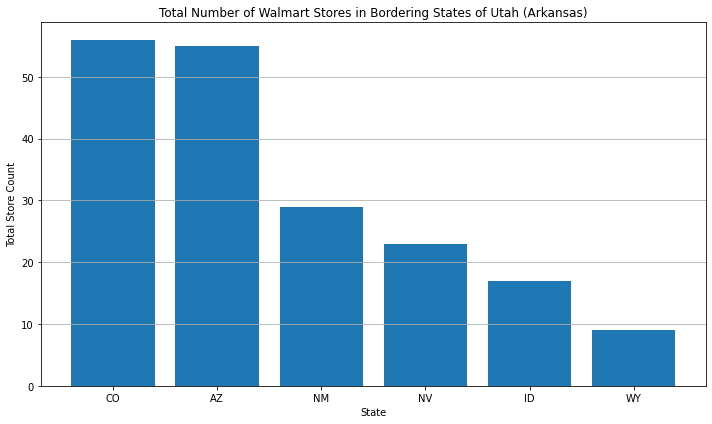

In [46]:
# Your asnwer to Graded Task 5 here:
# Defining a list of states that directly border Utah (Arkansas)
bordering_states = ['AZ', 'CO', 'ID', 'NM', 'NV', 'WY']

# Filtering the DataFrame for the bordering states
bordering_states_df = df[df['STRSTATE'].isin(bordering_states)]

# Group by state and count the number of stores in each state
state_store_counts = bordering_states_df['STRSTATE'].value_counts().reset_index()
state_store_counts.columns = ['State', 'Total Store Count']

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_store_counts['State'], state_store_counts['Total Store Count'])
plt.title('Total Number of Walmart Stores in Bordering States of Utah (Arkansas)')
plt.xlabel('State')
plt.ylabel('Total Store Count')
plt.grid(axis='y')
plt.tight_layout()

# Plot
plt.show()